# Code that runs tests for alphabets and checks

In [1]:
#!pip install tensorflow opencv-python matplotlib 
!pip install scikit-learn
!pip install matplotlib
!pip install ucimlrepo 
!pip install numpy
!pip install pandas



In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd



# Standard scientific Python imports
import matplotlib.pyplot as plt
import sklearn as skl  # Correct import statement
# Import datasets and features
from ucimlrepo import fetch_ucirepo, list_available_datasets
# fetch dataset 

from sklearn.model_selection import train_test_split  # Fix import statement
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import datasets, metrics, svm  # Fix import statements

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [3]:
# check which datasets can be imported
list_available_datasets()

-------------------------------------
The following datasets are available:
-------------------------------------
Dataset Name                                                                            ID    
------------                                                                            --    
Abalone                                                                                 1     
Adult                                                                                   2     
Auto MPG                                                                                9     
Automobile                                                                              10    
Breast Cancer                                                                           14    
Breast Cancer Wisconsin (Original)                                                      15    
Breast Cancer Wisconsin (Diagnostic)                                                    17    
Car Evaluation                 

Accuracy: 0.78225
Confusion matrix:
[[134   0   0   0   0   0   0   0   0   3   4   0   0   0   1   0   0   2
    2   1   0   0   1   0   1   0]
 [  1 116   0   4   0   2   0   5   1   0   0   0   0   0   4   1   1   6
    6   0   0   1   0   2   2   1]
 [  0   0 100   0   1   0   7   3   0   0  11   1   0   0   3   0   2   0
    1   3   5   0   0   0   0   0]
 [  0   6   0 129   0   1   0   0   0   6   1   0   0   4   2   0   1   2
    0   2   0   0   0   2   0   0]
 [  0   1   1   0 121   0   5   0   0   0   3   1   0   0   0   0   2   1
    4   1   0   0   0   0   0   1]
 [  0   3   0   1   2 113   7   0   2   1   1   0   0   0   0   1   0   1
    1   4   0   0   1   1   1   0]
 [  0   1  19   2   2   0  95   1   0   0   4   1   0   0   1   0  22   4
    2   0   0   4   1   1   0   0]
 [  3   3   0   9   0   2   0  60   0   0   8   0   1  10  20   2   2  12
    0   1   6   1   0   1   3   0]
 [  0   1   0   3   1   0   0   0 118  10   0   2   0   0   1   1   0   0
    1   0   0   0 

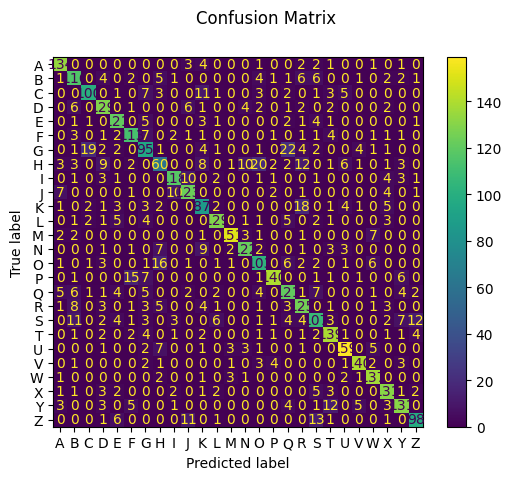

In [7]:
#data set import
letter_recognition = fetch_ucirepo(id=59) 

#access data set
X = letter_recognition.data.features
y = letter_recognition.data.targets


# Extract values from the DataFrame and flatten the target variable y
y = np.ravel(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#scale the result for preprocessing to fix max iterations 
#scaler = preprocessing.StandardScaler().fit(X_train)
#scaler
#print(f"scaler: {scaler}")

#scaledx = scaler.transform(X_train)

#print(f"X-scaled: {scaledx}")

# Initialize and train the Logistic Regression model
#model = LogisticRegression(C=1.0,max_iter=1000)
#model.fit(scaledx, y_train)

# Make predictions on the test set
#y_pred = model.predict(X_test)

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Logistic Regression model
model = LogisticRegression(C=1.0, max_iter=1000)
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)


# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

disp = metrics.ConfusionMatrixDisplay.from_predictions( y_test, y_pred)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()
